## Creating CNN Using Scratch And Transfer Learning

Please download the dataset from the below url

In [3]:
#!pip install tensorflow

In [4]:
import tensorflow as tf
print(tf.__version__)

2.3.1


In [5]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [6]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Dataset/Train'
valid_path = 'Dataset/Test'


In [7]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [8]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [9]:
# don't train existing weights
for layer in vgg19.layers:
    layer.trainable = False

In [10]:
  # useful for getting number of output classes
folders = glob('Dataset/Train/*')

In [11]:
folders

['Dataset/Train\\Parasite', 'Dataset/Train\\Uninfected']

In [13]:
# our layers - you can add more if you want
x = Flatten()(vgg19.output)

In [14]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg19.input, outputs=prediction)

In [15]:

# view the structure of the model
model.summary()


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [16]:
from tensorflow.keras.layers import MaxPooling2D

In [17]:
### Create Model from scratch using CNN

model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 50176)             0

In [18]:
# tell the model what cost and optimization method to use

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [19]:
# Use the Image Data Generator to import the images from the dataset

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [20]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [21]:
training_set

In [22]:
test_set = test_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [23]:
# fit the model

# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
13/13 [==============================] - 18s 1s/step - loss: 1.4273 - accuracy: 0.5649 - val_loss: 0.6919 - val_accuracy: 0.4776
Epoch 2/50
13/13 [==============================] - 17s 1s/step - loss: 0.5616 - accuracy: 0.6971 - val_loss: 0.8595 - val_accuracy: 0.3060
Epoch 3/50
13/13 [==============================] - 17s 1s/step - loss: 0.4763 - accuracy: 0.7596 - val_loss: 0.9270 - val_accuracy: 0.4552
Epoch 4/50
13/13 [==============================] - 17s 1s/step - loss: 0.4984 - accuracy: 0.7572 - val_loss: 0.8257 - val_accuracy: 0.4104
Epoch 5/50
13/13 [==============================] - 17s 1s/step - loss: 0.4358 - accuracy: 0.7981 - val_loss: 1.1340 - val_accuracy: 0.4254
Epoch 6/50
13/13 [==============================] - 17s 1s/step - loss: 0.3894 - accuracy: 0.8053 - val_loss: 0.7935 - val_accuracy: 0.4254
Epoch 7/50
13/13 [==============================] - 17s 1s/step - loss: 0.3571 - acc

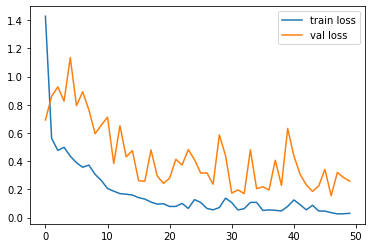

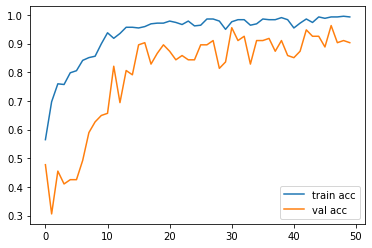

<Figure size 432x288 with 0 Axes>

In [25]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [26]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [27]:
y_pred = model.predict(test_set)

In [28]:
y_pred

array([[4.51545119e-02, 9.54845488e-01],
       [9.99940038e-01, 5.99917876e-05],
       [3.18964124e-02, 9.68103588e-01],
       [3.87741625e-03, 9.96122539e-01],
       [9.99999881e-01, 6.09894926e-08],
       [9.97687936e-01, 2.31202017e-03],
       [6.14346527e-02, 9.38565373e-01],
       [9.99836683e-01, 1.63263583e-04],
       [1.17185442e-02, 9.88281429e-01],
       [1.27873104e-02, 9.87212718e-01],
       [9.99986172e-01, 1.37843845e-05],
       [1.06656058e-02, 9.89334404e-01],
       [1.00000000e+00, 5.02967390e-10],
       [9.99989510e-01, 1.04478995e-05],
       [9.98408735e-01, 1.59132225e-03],
       [6.08750014e-03, 9.93912578e-01],
       [8.01602602e-01, 1.98397383e-01],
       [3.21728690e-03, 9.96782660e-01],
       [1.00000000e+00, 1.97774685e-13],
       [4.71354723e-01, 5.28645277e-01],
       [1.00000000e+00, 7.84381560e-10],
       [9.99599993e-01, 4.00079094e-04],
       [2.57721706e-03, 9.97422814e-01],
       [9.99990106e-01, 9.91449815e-06],
       [9.999850

In [29]:
import numpy as np

y_pred = np.argmax(y_pred, axis=1)

In [30]:
y_pred

array([1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0], dtype=int64)

In [36]:
# Load model

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [22]:
model=load_model('model_vgg19.h5')

In [31]:
# Test Data

In [132]:
img=image.load_img('Dataset/Test/Uninfected/C3thin_original_IMG_20150608_163047_cell_168.png',target_size=(224,224))


In [133]:
#img=image.load_img('Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105803_cell_88.png',target_size=(224,224))

In [134]:
x=image.img_to_array(img)
print(x)

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


In [135]:
x.shape

(224, 224, 3)

In [136]:
x=x/255

In [137]:
x=np.expand_dims(x,axis=0)

img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [138]:
model.predict(img_data)

array([[1., 0.]], dtype=float32)

In [139]:
a=np.argmax(model.predict(img_data), axis=1)

In [140]:
a

array([0], dtype=int64)

In [141]:
if(a==1):
    print("Uninfected")
else:
    print("Parasited")

Parasited


In [24]:
if tf.test.gpu_device_name():
    print('Default gpu_device:{}'.format(tf.test.gpu_device_name()))
else:
    print('please install gpu')

please install gpu
